In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [2]:
FIG_SIZE = (15,10)

In [3]:
file = "country.00000.wav"

In [4]:
# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)

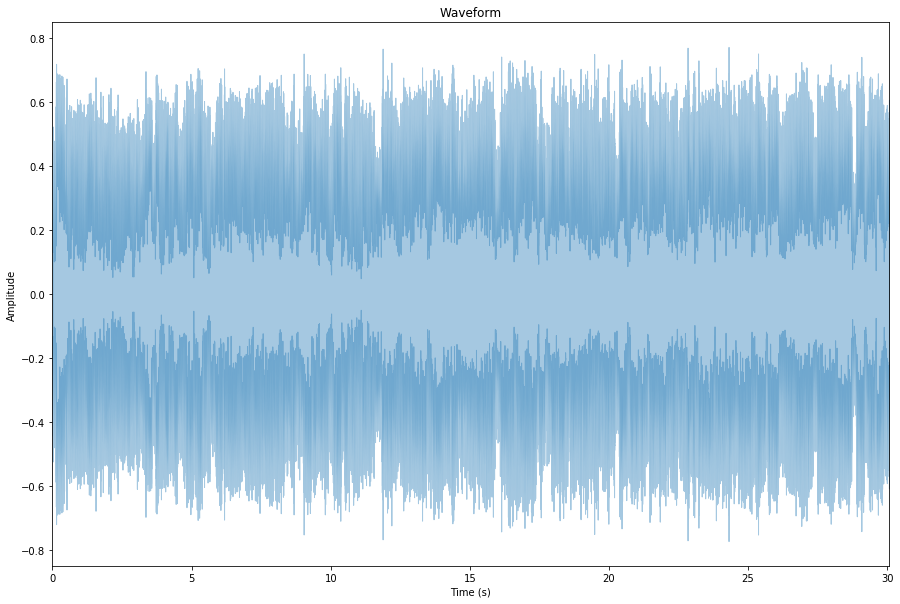

In [5]:
# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
# Saves an image in a folder
plt.savefig("./Images/country_audio_Waveform.png")

In [6]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

In [7]:
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

In [8]:
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

In [9]:

# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

In [10]:
# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power spectrum')

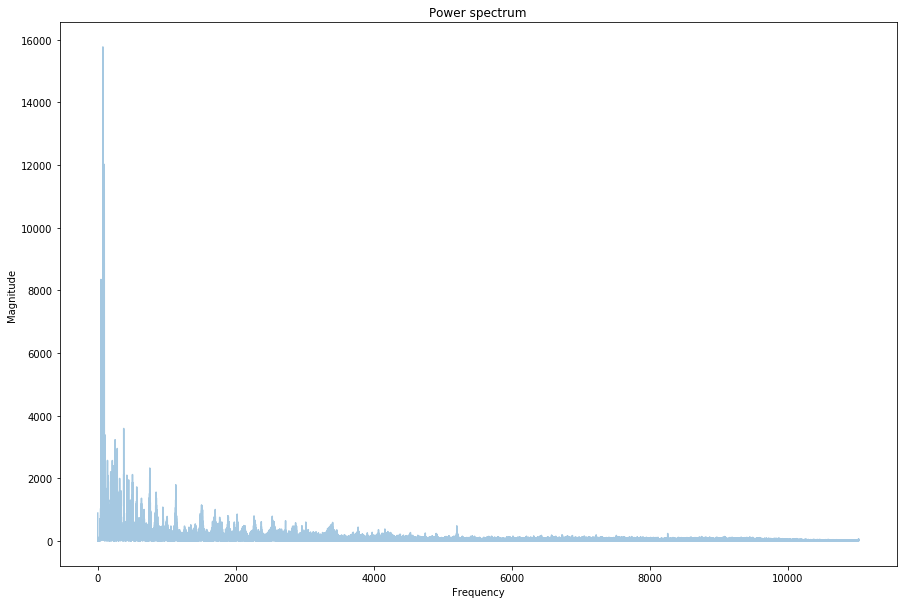

In [11]:
# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [12]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

In [13]:
# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


In [14]:
# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [15]:
# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

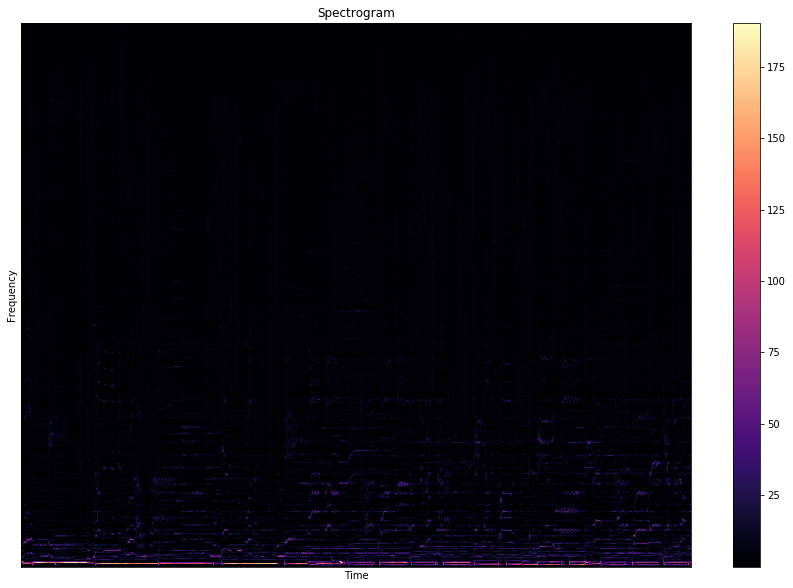

In [16]:
# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [17]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

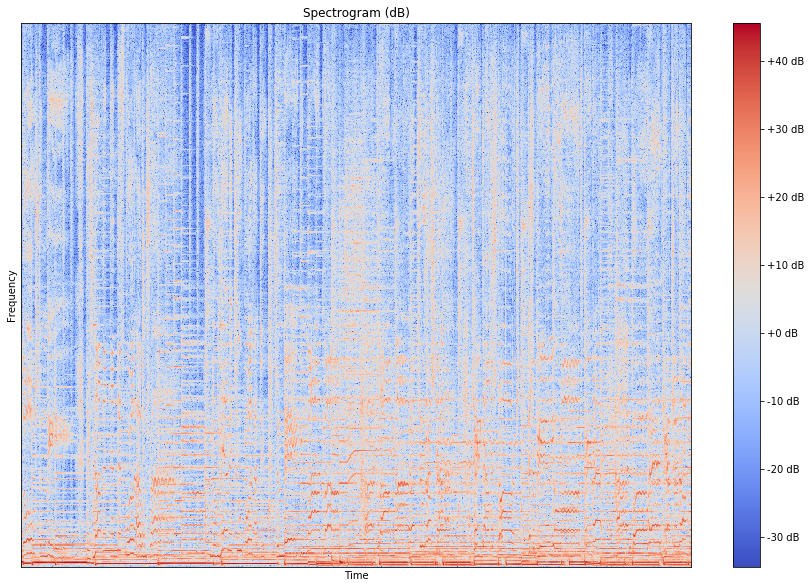

In [18]:
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
# Saves an image in a folder
plt.savefig("./Images/country_audio_Spectrogram.png")

In [19]:

# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

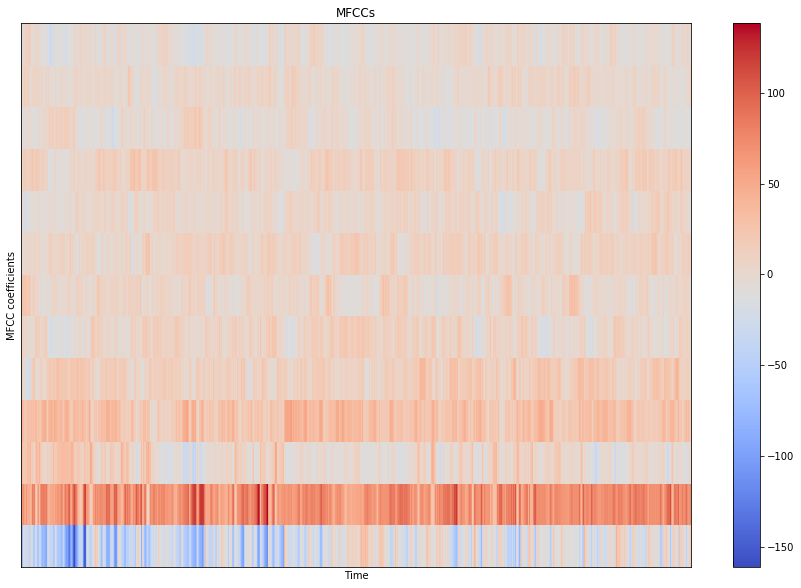

In [20]:
# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()